Wavelet Transform

In [15]:
import pandas as pd
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pywt

In [12]:
pip install PyWavelets


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
real_folder = '/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/REAL'
fake_folder = '/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/FAKE'

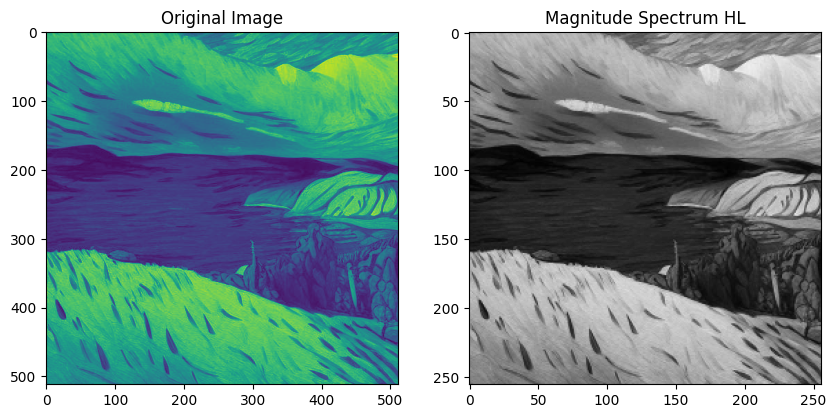

In [31]:
real_fft = []
fake_fft = []

output_real_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_real_wavelets_HL'
output_fake_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_fake_wavelets_HL'
os.makedirs(output_real_folder, exist_ok=True)
os.makedirs(output_fake_folder, exist_ok=True)

for filename in os.listdir(real_folder):
    image = Image.open(real_folder + '/' + filename).convert('L')
    image_np = np.array(image)
    coeffs = pywt.dwt2(image_np, 'db1')
    magnitude_spectrum = coeffs[0]
    output_path = os.path.join(output_real_folder, filename.split('.')[0] + '_1.npy')
    np.save(output_path, magnitude_spectrum)

for filename in os.listdir(fake_folder):
    image = Image.open(fake_folder + '/' + filename).convert('L')
    image_np = np.array(image)
    coeffs = pywt.dwt2(image_np, 'db1')
    #Can change the indices to decide which of the coeffcients of wavelet you want. Look online and figure out which is the best. 
    magnitude_spectrum = coeffs[0]
    output_path = os.path.join(output_fake_folder, filename.split('.')[0] + '_0.npy')
    np.save(output_path, magnitude_spectrum)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_np), plt.title('Original Image')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum HL')
plt.show()